In [34]:
#What need to be installed:

#pip install beautifulsoup4
#pip install nltk
#pip install lxml

In [35]:
import sys
import bs4
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML
import re

import nltk

import pandas as pd

In [36]:
address = "https://en.wikipedia.org/wiki/Cat" # paste website address (english)
address = urllib.request.urlopen(address).read()

soup = BeautifulSoup(address, "lxml")

In [37]:
soup_no_p = soup.find_all("p")

In [38]:
soup_no_p

[<p class="mw-empty-elt">
 </p>,
 <p>The <b>cat</b> (<i>Felis catus</i>) is a <a href="/wiki/Domestication" title="Domestication">domestic</a> <a href="/wiki/Species" title="Species">species</a> of small <a class="mw-redirect" href="/wiki/Carnivorous" title="Carnivorous">carnivorous</a> <a href="/wiki/Mammal" title="Mammal">mammal</a>.<sup class="reference" id="cite_ref-Linnaeus1758_1-1"><a href="#cite_note-Linnaeus1758-1">[1]</a></sup><sup class="reference" id="cite_ref-MSW3fc_2-1"><a href="#cite_note-MSW3fc-2">[2]</a></sup> It is the only domesticated species in the family <a href="/wiki/Felidae" title="Felidae">Felidae</a> and is often referred to as the <b>domestic cat</b> to distinguish it from the wild members of the family.<sup class="reference" id="cite_ref-Clutton-Brock1999_4-0"><a href="#cite_note-Clutton-Brock1999-4">[4]</a></sup> A cat can either be a <b>house cat</b>, a <a href="/wiki/Farm_cat" title="Farm cat">farm cat</a> or a <a href="/wiki/Feral_cat" title="Feral cat">

In [39]:
text_only = []

for i in soup_no_p:
    a = i.get_text()
    text_only.append(a)

text_only = str(text_only)
    

In [40]:
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(text_only)
print("Word tokenizing the text: \n")
print(word_tk)

Word tokenizing the text: 

['[', "'\\n", "'", ',', "'The", 'cat', '(', 'Felis', 'catus', ')', 'is', 'a', 'domestic', 'species', 'of', 'small', 'carnivorous', 'mammal', '.', '[', '1', ']', '[', '2', ']', 'It', 'is', 'the', 'only', 'domesticated', 'species', 'in', 'the', 'family', 'Felidae', 'and', 'is', 'often', 'referred', 'to', 'as', 'the', 'domestic', 'cat', 'to', 'distinguish', 'it', 'from', 'the', 'wild', 'members', 'of', 'the', 'family', '.', '[', '4', ']', 'A', 'cat', 'can', 'either', 'be', 'a', 'house', 'cat', ',', 'a', 'farm', 'cat', 'or', 'a', 'feral', 'cat', ';', 'the', 'latter', 'ranges', 'freely', 'and', 'avoids', 'human', 'contact', '.', '[', '5', ']', 'Domestic', 'cats', 'are', 'valued', 'by', 'humans', 'for', 'companionship', 'and', 'their', 'ability', 'to', 'hunt', 'rodents', '.', 'About', '60', 'cat', 'breeds', 'are', 'recognized', 'by', 'various', 'cat', 'registries', '.', '[', '6', ']', '\\n', "'", ',', "'The", 'cat', 'is', 'similar', 'in', 'anatomy', 'to', 'the', '

In [41]:
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karina.Zablocka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
filtered_words = [w for w in word_tk if not w in sw]

print("The text after removing stop words: \n")
print(filtered_words)

The text after removing stop words: 

['[', "'\\n", "'", ',', "'The", 'cat', '(', 'Felis', 'catus', ')', 'domestic', 'species', 'small', 'carnivorous', 'mammal', '.', '[', '1', ']', '[', '2', ']', 'It', 'domesticated', 'species', 'family', 'Felidae', 'often', 'referred', 'domestic', 'cat', 'distinguish', 'wild', 'members', 'family', '.', '[', '4', ']', 'A', 'cat', 'either', 'house', 'cat', ',', 'farm', 'cat', 'feral', 'cat', ';', 'latter', 'ranges', 'freely', 'avoids', 'human', 'contact', '.', '[', '5', ']', 'Domestic', 'cats', 'valued', 'humans', 'companionship', 'ability', 'hunt', 'rodents', '.', 'About', '60', 'cat', 'breeds', 'recognized', 'various', 'cat', 'registries', '.', '[', '6', ']', '\\n', "'", ',', "'The", 'cat', 'similar', 'anatomy', 'felid', 'species', ':', 'strong', 'flexible', 'body', ',', 'quick', 'reflexes', ',', 'sharp', 'teeth', 'retractable', 'claws', 'adapted', 'killing', 'small', 'prey', '.', 'Its', 'night', 'vision', 'sense', 'smell', 'well', 'developed', '.', 

In [43]:
filtered_words_lower = []

for i in filtered_words:
    i = i.lower()
    filtered_words_lower.append(i)
    

filtered_words = filtered_words_lower

In [44]:
filtered_words

['[',
 "'\\n",
 "'",
 ',',
 "'the",
 'cat',
 '(',
 'felis',
 'catus',
 ')',
 'domestic',
 'species',
 'small',
 'carnivorous',
 'mammal',
 '.',
 '[',
 '1',
 ']',
 '[',
 '2',
 ']',
 'it',
 'domesticated',
 'species',
 'family',
 'felidae',
 'often',
 'referred',
 'domestic',
 'cat',
 'distinguish',
 'wild',
 'members',
 'family',
 '.',
 '[',
 '4',
 ']',
 'a',
 'cat',
 'either',
 'house',
 'cat',
 ',',
 'farm',
 'cat',
 'feral',
 'cat',
 ';',
 'latter',
 'ranges',
 'freely',
 'avoids',
 'human',
 'contact',
 '.',
 '[',
 '5',
 ']',
 'domestic',
 'cats',
 'valued',
 'humans',
 'companionship',
 'ability',
 'hunt',
 'rodents',
 '.',
 'about',
 '60',
 'cat',
 'breeds',
 'recognized',
 'various',
 'cat',
 'registries',
 '.',
 '[',
 '6',
 ']',
 '\\n',
 "'",
 ',',
 "'the",
 'cat',
 'similar',
 'anatomy',
 'felid',
 'species',
 ':',
 'strong',
 'flexible',
 'body',
 ',',
 'quick',
 'reflexes',
 ',',
 'sharp',
 'teeth',
 'retractable',
 'claws',
 'adapted',
 'killing',
 'small',
 'prey',
 '.',
 '

In [45]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()

lemm_words = []

for i in range (len(filtered_words)):
    lemm_words.append(lem.lemmatize(filtered_words[i]))
    
print(lemm_words)

['[', "'\\n", "'", ',', "'the", 'cat', '(', 'felis', 'catus', ')', 'domestic', 'specie', 'small', 'carnivorous', 'mammal', '.', '[', '1', ']', '[', '2', ']', 'it', 'domesticated', 'specie', 'family', 'felidae', 'often', 'referred', 'domestic', 'cat', 'distinguish', 'wild', 'member', 'family', '.', '[', '4', ']', 'a', 'cat', 'either', 'house', 'cat', ',', 'farm', 'cat', 'feral', 'cat', ';', 'latter', 'range', 'freely', 'avoids', 'human', 'contact', '.', '[', '5', ']', 'domestic', 'cat', 'valued', 'human', 'companionship', 'ability', 'hunt', 'rodent', '.', 'about', '60', 'cat', 'breed', 'recognized', 'various', 'cat', 'registry', '.', '[', '6', ']', '\\n', "'", ',', "'the", 'cat', 'similar', 'anatomy', 'felid', 'specie', ':', 'strong', 'flexible', 'body', ',', 'quick', 'reflex', ',', 'sharp', 'teeth', 'retractable', 'claw', 'adapted', 'killing', 'small', 'prey', '.', 'it', 'night', 'vision', 'sense', 'smell', 'well', 'developed', '.', 'cat', 'communication', 'includes', 'vocalization', '

In [46]:
a = [",", ".", "(", ")", ";", ":", "`", "'"]

for i in a:
    lemm_words = ([s for s in lemm_words if s != i])
    

In [47]:
value = pd.value_counts(lemm_words)
print(value)

cat            278
[              265
]              265
\n              64
domestic        46
              ... 
176              1
comb             1
impregnated      1
texture          1
monarch          1
Length: 2351, dtype: int64


In [48]:
from nltk.probability import FreqDist
fd = FreqDist(lemm_words)

print(fd)

<FreqDist with 2351 samples and 5429 outcomes>


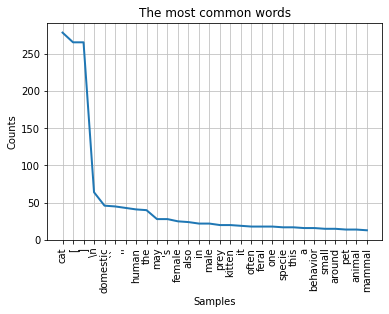

In [52]:
import matplotlib.pyplot as plt
fd.plot(30, cumulative=False, title='The most common words')
plt.show()